In [5]:
import random # Random Number Generator 
import numpy as np #  Library for math / matrix commands
import matplotlib.pyplot as plt  # Plotting library
import pandas as pd # DataFrame Library
import tensorflow as tf # Machine Learning Library (This might take a little bit of time to load)

# (For Jupyter Notebook): Display Plots Inline
%matplotlib inline

In [67]:
# This code trains the neural network called `model` to fit the function y(x) = exp(T+x) / (1+exp(T+x))

# define the loss function
def loss_fn(y_true,y_pred):
    return tf.math.reduce_sum(tf.math.square((y_pred-y_true)))

# generate training data from the true function
np.random.seed(1234)
xData = np.random.normal(0,1,500)
T = float(0.5)
y = np.exp(T+xData) /(1+np.exp(T+xData))
d = [(xData,y)]


# Construct Model Architecture
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.,seed=1)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,)),
    tf.keras.layers.Dense(10, kernel_initializer=initializer),
    tf.keras.layers.Dense(10,activation = 'sigmoid', kernel_initializer=initializer),
    tf.keras.layers.Dense(1, kernel_initializer=initializer)
])

# Define Model Setting
model.compile(optimizer='adam',
              loss = loss_fn,
              metrics=['accuracy'])


# Train the neural network
history = tf.keras.callbacks.History() # Lets us look back at the performance of each epoch
model.fit(xData,y, epochs=100, verbose = 0,callbacks=[history])

# Generate Predicted Values
predictions = model.predict(xData)

# Show Initial and Final Loss
print("Initial Loss %f" %history.history['loss'][0])
print("Final Loss %f" %history.history['loss'][-1])

Initial Loss 179.052428
Final Loss 0.004053


In [65]:
# Compare function we are trying to fit with the trained neural network

# Store  Results in DataFrame For  Easy Plotting, Analysis, etc (not really necessary)
df = pd.DataFrame({'x': xData.tolist(),'yhat': [x[0] for x in predictions.tolist()]})
df['true_y'] = df['x'].apply(lambda x: np.exp(T+x) /(1+np.exp(T+x)))
df.head() # Show first 5 rows

,x,yhat,true_y
0,0.471435,0.727825,0.725405
1,-1.190976,0.324476,0.333816
2,1.432707,0.870462,0.873549
3,-0.312652,0.544781,0.546701
4,-0.720589,0.462750,0.445075


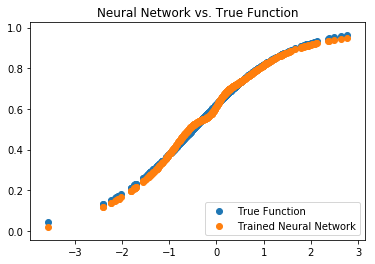

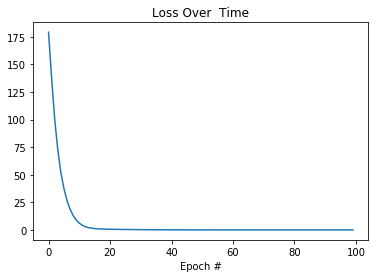

In [66]:
# Plot Neural Network vs. True
plt.scatter(df.x,df.true_y,label = "True Function")
plt.scatter(df.x,df.yhat,label = "Trained Neural Network")
plt.legend(loc="lower right")
plt.title("Neural Network vs. True Function")
plt.show()

# Plot Loss Over  Time
plt.figure()
plt.plot(history.history['loss'])
plt.title("Loss Over  Time")
plt.xlabel("Epoch #")
plt.show()